In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.datasets.longley import load_pandas

import warnings
warnings.filterwarnings(action='ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
atrain = pd.read_csv('/users/jjong/Desktop/vscode/Dacon_src/km_univ/apply_train.csv')
company =pd.read_csv('/users/jjong/Desktop/vscode/Dacon_src/km_univ/company.csv')
recruit = pd.read_csv('/users/jjong/Desktop/vscode/Dacon_src/km_univ/recruitment.csv')
resume_c = pd.read_csv('/users/jjong/Desktop/vscode/Dacon_src/km_univ/resume_certificate.csv')
resume_e = pd.read_csv('/users/jjong/Desktop/vscode/Dacon_src/km_univ/resume_education.csv')
resume_l = pd.read_csv('/users/jjong/Desktop/vscode/Dacon_src/km_univ/resume_language.csv')
resume = pd.read_csv('/users/jjong/Desktop/vscode/Dacon_src/km_univ/resume.csv')
sample = pd.read_csv('/users/jjong/Desktop/vscode/Dacon_src/km_univ/sample_submission.csv')

In [3]:
resume.drop(['job_code_seq2', 'job_code_seq3'], axis=1, inplace=True)
# resume.dropna(inplace=True)
resume

,resume_seq,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,text_keyword,job_code_seq1,career_month,career_job_code
0,U00606,2020-03-04,2020-05-22,4,2008,3500.0,3500.0,스타일디자이너;우븐디자이너,재료·화학·섬유·의복,67,NaN
1,U00509,2019-08-25,2020-09-02,2,0,0.0,3700.0,상품기획;MD;기획;머천다이저;머천다이징,재료·화학·섬유·의복,84,섬유;봉제;가방;의류
2,U02012,2017-11-20,2020-01-26,5,1979,3500.0,3100.0,니트디자인,재료·화학·섬유·의복,121,학교;학원;직원훈련(교육서비스)
3,U04599,2020-05-13,2020-05-28,4,2012,0.0,2500.0,MD;기획MD,재료·화학·섬유·의복,24,섬유;봉제;가방;의류
4,U07573,2019-07-23,2020-03-08,4,2010,1900.0,0.0,디자이너;남성복;스포츠웨어;편집디자인;코디네이터;일러스트레이터;VMD;MD,재료·화학·섬유·의복,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8477,U04890,2018-05-27,2020-08-26,5,1994,0.0,6250.0,상품기획;생산;글로벌소싱;남성복;여성복,재료·화학·섬유·의복,204,섬유;봉제;가방;의류
8478,U05910,2019-09-27,2020-10-22,4,2013,2300.0,1900.0,소재;기획MD;남성복;온라인MD;디자이너,재료·화학·섬유·의복,12,섬유;봉제;가방;의류
8479,U01468,2019-02-26,2020-06-23,4,2008,0.0,0.0,상품기획MD;우븐디자인,디자인,0,섬유;봉제;가방;의류
8480,U05315,2020-03-27,2020-12-21,4,2016,0.0,0.0,여성복디자인;우븐디자인;다이마루디자인,재료·화학·섬유·의복,18,디자인;CAD;설계


In [4]:
resume['career_job_code'] = resume['career_job_code'].fillna(0)
resume['text_keyword'] = resume['text_keyword'].fillna(0)
resume

,resume_seq,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,text_keyword,job_code_seq1,career_month,career_job_code
0,U00606,2020-03-04,2020-05-22,4,2008,3500.0,3500.0,스타일디자이너;우븐디자이너,재료·화학·섬유·의복,67,0
1,U00509,2019-08-25,2020-09-02,2,0,0.0,3700.0,상품기획;MD;기획;머천다이저;머천다이징,재료·화학·섬유·의복,84,섬유;봉제;가방;의류
2,U02012,2017-11-20,2020-01-26,5,1979,3500.0,3100.0,니트디자인,재료·화학·섬유·의복,121,학교;학원;직원훈련(교육서비스)
3,U04599,2020-05-13,2020-05-28,4,2012,0.0,2500.0,MD;기획MD,재료·화학·섬유·의복,24,섬유;봉제;가방;의류
4,U07573,2019-07-23,2020-03-08,4,2010,1900.0,0.0,디자이너;남성복;스포츠웨어;편집디자인;코디네이터;일러스트레이터;VMD;MD,재료·화학·섬유·의복,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8477,U04890,2018-05-27,2020-08-26,5,1994,0.0,6250.0,상품기획;생산;글로벌소싱;남성복;여성복,재료·화학·섬유·의복,204,섬유;봉제;가방;의류
8478,U05910,2019-09-27,2020-10-22,4,2013,2300.0,1900.0,소재;기획MD;남성복;온라인MD;디자이너,재료·화학·섬유·의복,12,섬유;봉제;가방;의류
8479,U01468,2019-02-26,2020-06-23,4,2008,0.0,0.0,상품기획MD;우븐디자인,디자인,0,섬유;봉제;가방;의류
8480,U05315,2020-03-27,2020-12-21,4,2016,0.0,0.0,여성복디자인;우븐디자인;다이마루디자인,재료·화학·섬유·의복,18,디자인;CAD;설계


In [5]:
resume.isna().sum()

resume_seq         0
reg_date           0
updated_date       0
degree             0
graduate_date      0
hope_salary        0
last_salary        0
text_keyword       0
job_code_seq1      0
career_month       0
career_job_code    0
dtype: int64

In [6]:
resume_c

,resume_seq,certificate_contents
0,U06421,손해보험사
1,U01278,2종운전면허증
2,U01008,자동차운전면허 2종 보통
3,U03248,운전면허2종보통
4,U07483,메이크업3급
...,...,...
12970,U07453,컬러리스트산업기사
12971,U06358,컴퓨터그래픽스운용기능사
12972,U03248,수치제어밀링기능사
12973,U08157,주산2급


In [7]:
resume_all = pd.merge(resume, resume_c, how='outer', on='resume_seq')
resume_all

,resume_seq,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,text_keyword,job_code_seq1,career_month,career_job_code,certificate_contents
0,U00606,2020-03-04,2020-05-22,4,2008,3500.0,3500.0,스타일디자이너;우븐디자이너,재료·화학·섬유·의복,67,0,NaN
1,U00509,2019-08-25,2020-09-02,2,0,0.0,3700.0,상품기획;MD;기획;머천다이저;머천다이징,재료·화학·섬유·의복,84,섬유;봉제;가방;의류,NaN
2,U02012,2017-11-20,2020-01-26,5,1979,3500.0,3100.0,니트디자인,재료·화학·섬유·의복,121,학교;학원;직원훈련(교육서비스),중등 2급 정교사
3,U04599,2020-05-13,2020-05-28,4,2012,0.0,2500.0,MD;기획MD,재료·화학·섬유·의복,24,섬유;봉제;가방;의류,MCAS MASTER 2007
4,U04599,2020-05-13,2020-05-28,4,2012,0.0,2500.0,MD;기획MD,재료·화학·섬유·의복,24,섬유;봉제;가방;의류,VMD MASTER
...,...,...,...,...,...,...,...,...,...,...,...,...
15476,U05910,2019-09-27,2020-10-22,4,2013,2300.0,1900.0,소재;기획MD;남성복;온라인MD;디자이너,재료·화학·섬유·의복,12,섬유;봉제;가방;의류,샵마스터 3급
15477,U05910,2019-09-27,2020-10-22,4,2013,2300.0,1900.0,소재;기획MD;남성복;온라인MD;디자이너,재료·화학·섬유·의복,12,섬유;봉제;가방;의류,MOS(엑셀
15478,U01468,2019-02-26,2020-06-23,4,2008,0.0,0.0,상품기획MD;우븐디자인,디자인,0,섬유;봉제;가방;의류,자동차 운전면허증 1종보통
15479,U05315,2020-03-27,2020-12-21,4,2016,0.0,0.0,여성복디자인;우븐디자인;다이마루디자인,재료·화학·섬유·의복,18,디자인;CAD;설계,1종보통 운전면허증


In [8]:
resume_all['certificate_contents'] = resume_all['certificate_contents'].fillna(0)
resume_all

,resume_seq,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,text_keyword,job_code_seq1,career_month,career_job_code,certificate_contents
0,U00606,2020-03-04,2020-05-22,4,2008,3500.0,3500.0,스타일디자이너;우븐디자이너,재료·화학·섬유·의복,67,0,0
1,U00509,2019-08-25,2020-09-02,2,0,0.0,3700.0,상품기획;MD;기획;머천다이저;머천다이징,재료·화학·섬유·의복,84,섬유;봉제;가방;의류,0
2,U02012,2017-11-20,2020-01-26,5,1979,3500.0,3100.0,니트디자인,재료·화학·섬유·의복,121,학교;학원;직원훈련(교육서비스),중등 2급 정교사
3,U04599,2020-05-13,2020-05-28,4,2012,0.0,2500.0,MD;기획MD,재료·화학·섬유·의복,24,섬유;봉제;가방;의류,MCAS MASTER 2007
4,U04599,2020-05-13,2020-05-28,4,2012,0.0,2500.0,MD;기획MD,재료·화학·섬유·의복,24,섬유;봉제;가방;의류,VMD MASTER
...,...,...,...,...,...,...,...,...,...,...,...,...
15476,U05910,2019-09-27,2020-10-22,4,2013,2300.0,1900.0,소재;기획MD;남성복;온라인MD;디자이너,재료·화학·섬유·의복,12,섬유;봉제;가방;의류,샵마스터 3급
15477,U05910,2019-09-27,2020-10-22,4,2013,2300.0,1900.0,소재;기획MD;남성복;온라인MD;디자이너,재료·화학·섬유·의복,12,섬유;봉제;가방;의류,MOS(엑셀
15478,U01468,2019-02-26,2020-06-23,4,2008,0.0,0.0,상품기획MD;우븐디자인,디자인,0,섬유;봉제;가방;의류,자동차 운전면허증 1종보통
15479,U05315,2020-03-27,2020-12-21,4,2016,0.0,0.0,여성복디자인;우븐디자인;다이마루디자인,재료·화학·섬유·의복,18,디자인;CAD;설계,1종보통 운전면허증


In [9]:
resume_l = resume_l.rename(columns={'score':'language_score', 'exam_name':'lang_exam'})

In [10]:
resume_l

,resume_seq,language,lang_exam,language_score
0,U01774,2,4,742.42
1,U04892,2,4,888.89
2,U01859,2,4,500.00
3,U02475,2,4,500.00
4,U03776,4,5,595.96
...,...,...,...,...
864,U04964,2,11,400.00
865,U02950,2,4,843.43
866,U05922,2,2,500.00
867,U03827,2,4,883.84


In [11]:
resume_all = pd.merge(resume, resume_l, how='outer', on='resume_seq')
resume_all

,resume_seq,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,text_keyword,job_code_seq1,career_month,career_job_code,language,lang_exam,language_score
0,U00606,2020-03-04,2020-05-22,4,2008,3500.0,3500.0,스타일디자이너;우븐디자이너,재료·화학·섬유·의복,67,0,NaN,NaN,NaN
1,U00509,2019-08-25,2020-09-02,2,0,0.0,3700.0,상품기획;MD;기획;머천다이저;머천다이징,재료·화학·섬유·의복,84,섬유;봉제;가방;의류,NaN,NaN,NaN
2,U02012,2017-11-20,2020-01-26,5,1979,3500.0,3100.0,니트디자인,재료·화학·섬유·의복,121,학교;학원;직원훈련(교육서비스),NaN,NaN,NaN
3,U04599,2020-05-13,2020-05-28,4,2012,0.0,2500.0,MD;기획MD,재료·화학·섬유·의복,24,섬유;봉제;가방;의류,2.0,4.0,792.93
4,U07573,2019-07-23,2020-03-08,4,2010,1900.0,0.0,디자이너;남성복;스포츠웨어;편집디자인;코디네이터;일러스트레이터;VMD;MD,재료·화학·섬유·의복,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8526,U04890,2018-05-27,2020-08-26,5,1994,0.0,6250.0,상품기획;생산;글로벌소싱;남성복;여성복,재료·화학·섬유·의복,204,섬유;봉제;가방;의류,NaN,NaN,NaN
8527,U05910,2019-09-27,2020-10-22,4,2013,2300.0,1900.0,소재;기획MD;남성복;온라인MD;디자이너,재료·화학·섬유·의복,12,섬유;봉제;가방;의류,NaN,NaN,NaN
8528,U01468,2019-02-26,2020-06-23,4,2008,0.0,0.0,상품기획MD;우븐디자인,디자인,0,섬유;봉제;가방;의류,NaN,NaN,NaN
8529,U05315,2020-03-27,2020-12-21,4,2016,0.0,0.0,여성복디자인;우븐디자인;다이마루디자인,재료·화학·섬유·의복,18,디자인;CAD;설계,NaN,NaN,NaN


In [12]:
resume_all['language'] = resume_all['language'].fillna(0)
resume_all['lang_exam'] = resume_all['lang_exam'].fillna(0)
resume_all['language_score'] = resume_all['language_score'].fillna(0)


In [13]:
resume_e = resume_e.drop(['univ_major', 'univ_sub_major', 'univ_type_seq2', 'hischool_gender'], axis=1)

In [14]:
resume_all = pd.merge(resume, resume_e, how='outer', on='resume_seq')
resume_all

,resume_seq,reg_date,updated_date,degree,graduate_date,hope_salary,last_salary,text_keyword,job_code_seq1,career_month,career_job_code,hischool_type_seq,hischool_special_type,hischool_nation,hischool_location_seq,univ_type_seq1,univ_transfer,univ_location,univ_major_type,univ_score
0,U00606,2020-03-04,2020-05-22,4,2008,3500.0,3500.0,스타일디자이너;우븐디자이너,재료·화학·섬유·의복,67,0,21,일반고,공립,11,5,0,11,4,70.0
1,U00509,2019-08-25,2020-09-02,2,0,0.0,3700.0,상품기획;MD;기획;머천다이저;머천다이징,재료·화학·섬유·의복,84,섬유;봉제;가방;의류,0,기타,기타,0,5,0,5,4,90.0
2,U02012,2017-11-20,2020-01-26,5,1979,3500.0,3100.0,니트디자인,재료·화학·섬유·의복,121,학교;학원;직원훈련(교육서비스),0,기타,기타,0,5,0,3,9,90.0
3,U04599,2020-05-13,2020-05-28,4,2012,0.0,2500.0,MD;기획MD,재료·화학·섬유·의복,24,섬유;봉제;가방;의류,21,일반고,사립,7,3,0,11,19,80.0
4,U07573,2019-07-23,2020-03-08,4,2010,1900.0,0.0,디자이너;남성복;스포츠웨어;편집디자인;코디네이터;일러스트레이터;VMD;MD,재료·화학·섬유·의복,0,0,21,일반고,공립,4,5,0,13,19,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8477,U04890,2018-05-27,2020-08-26,5,1994,0.0,6250.0,상품기획;생산;글로벌소싱;남성복;여성복,재료·화학·섬유·의복,204,섬유;봉제;가방;의류,21,일반고,사립,3,5,0,3,3,70.0
8478,U05910,2019-09-27,2020-10-22,4,2013,2300.0,1900.0,소재;기획MD;남성복;온라인MD;디자이너,재료·화학·섬유·의복,12,섬유;봉제;가방;의류,21,일반고,공립,15,5,0,15,19,80.0
8479,U01468,2019-02-26,2020-06-23,4,2008,0.0,0.0,상품기획MD;우븐디자인,디자인,0,섬유;봉제;가방;의류,0,기타,기타,0,5,0,18,9,80.0
8480,U05315,2020-03-27,2020-12-21,4,2016,0.0,0.0,여성복디자인;우븐디자인;다이마루디자인,재료·화학·섬유·의복,18,디자인;CAD;설계,21,일반고,공립,5,5,0,3,9,80.0


<Figure size 640x480 with 0 Axes>

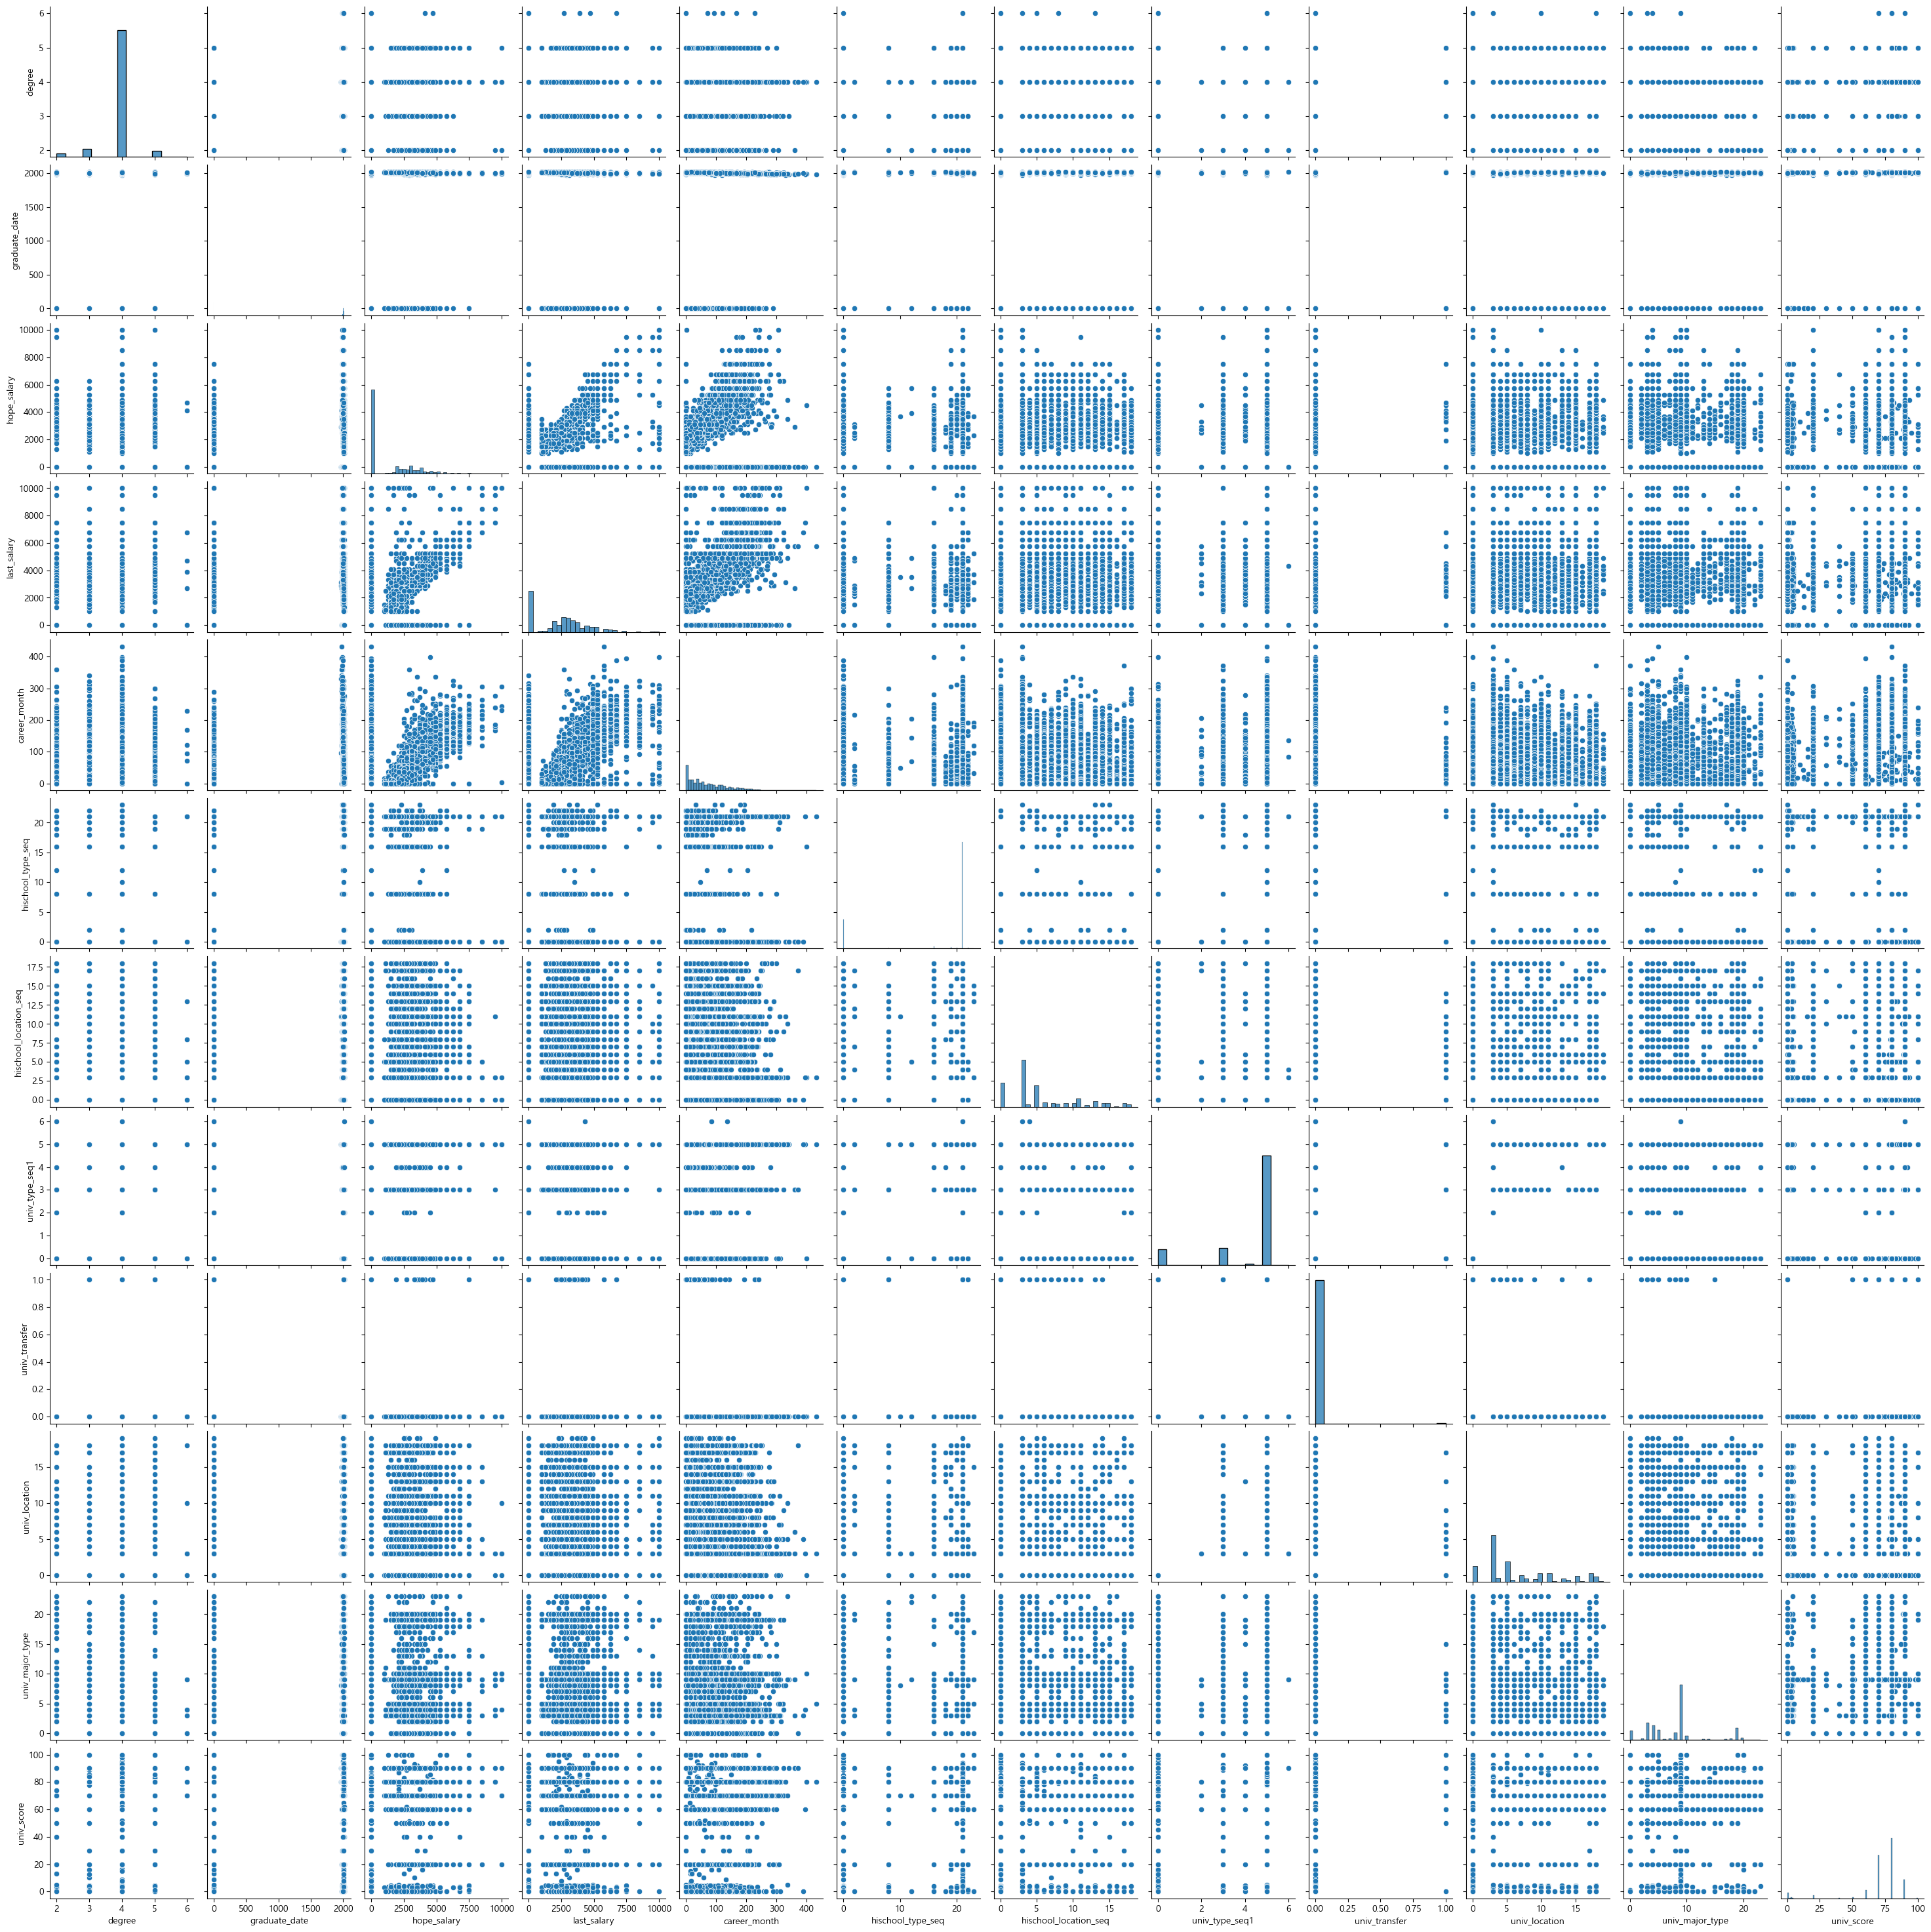

In [157]:
plt.figure()
sns.pairplot(resume_all)
plt.show()

In [15]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

numeric_columns = resume_all.select_dtypes(include=['int', 'float'])


data_with_const = sm.add_constant(numeric_columns)

# 각 열에 대한 다중공선성 계산
vif_data = pd.DataFrame()
vif_data["VIF Factor"] = [variance_inflation_factor(data_with_const.values, i) for i in range(data_with_const.shape[1])]
vif_data["features"] = data_with_const.columns

# 결과 출력
print(vif_data)

    VIF Factor               features
0    96.525981                  const
1     1.162639                 degree
2     1.153426          graduate_date
3     1.198621            hope_salary
4     1.696763            last_salary
5     1.521275           career_month
6     1.224965      hischool_type_seq
7     1.303801  hischool_location_seq
8     1.180402         univ_type_seq1
9     1.002867          univ_transfer
10    1.241813          univ_location
11    1.008672        univ_major_type
12    1.068396             univ_score


In [16]:
resume_all['hischool_location_seq'].unique()

array([11,  0,  7,  4, 18,  5, 12,  8,  3, 13, 15, 17,  9,  6, 14, 10, 16],
      dtype=int64)

In [17]:
btrain = pd.merge(resume_all, atrain, how='outer', on='resume_seq')

btrain['resume_seq'] = btrain['resume_seq'].str[1:]
btrain['resume_seq'] = btrain['resume_seq'].astype('int64')
btrain['recruitment_seq'] = btrain['recruitment_seq'].str[1:]
btrain['recruitment_seq'] = btrain['recruitment_seq'].astype('int64')

numeric_columns = btrain.select_dtypes(include=['int', 'float']).astype(float)

In [18]:
btrain.drop(['last_salary', 'reg_date', 'updated_date', 'career_job_code', 'text_keyword', 'hischool_special_type'], axis=1, inplace=True)
btrain

,resume_seq,degree,graduate_date,hope_salary,job_code_seq1,career_month,hischool_type_seq,hischool_nation,hischool_location_seq,univ_type_seq1,univ_transfer,univ_location,univ_major_type,univ_score,recruitment_seq
0,606,4,2008,3500.0,재료·화학·섬유·의복,67,21,공립,11,5,0,11,4,70.0,4588
1,606,4,2008,3500.0,재료·화학·섬유·의복,67,21,공립,11,5,0,11,4,70.0,1081
2,606,4,2008,3500.0,재료·화학·섬유·의복,67,21,공립,11,5,0,11,4,70.0,659
3,606,4,2008,3500.0,재료·화학·섬유·의복,67,21,공립,11,5,0,11,4,70.0,2544
4,606,4,2008,3500.0,재료·화학·섬유·의복,67,21,공립,11,5,0,11,4,70.0,610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57941,5315,4,2016,0.0,재료·화학·섬유·의복,18,21,공립,5,5,0,3,9,80.0,105
57942,5315,4,2016,0.0,재료·화학·섬유·의복,18,21,공립,5,5,0,3,9,80.0,2701
57943,5315,4,2016,0.0,재료·화학·섬유·의복,18,21,공립,5,5,0,3,9,80.0,6081
57944,1277,4,2009,2100.0,재료·화학·섬유·의복,3,21,공립,5,5,0,3,5,80.0,3697


In [19]:
btrain['hischool_nation'].unique()
btrain['hischool_nation'] = btrain['hischool_nation'].apply(lambda x: 0 if x == '사립' else 1 if x == '공립' else 2)

In [20]:
# OLS 모델 피팅
model = sm.OLS(btrain['resume_seq'], numeric_columns)  # 독립 변수 열 추가
results = model.fit()

# 회귀 분석 결과 요약
summary = results.summary()
print(summary)

                                 OLS Regression Results                                
Dep. Variable:             resume_seq   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          7.684e+33
Date:                Wed, 25 Oct 2023   Prob (F-statistic):                        0.00
Time:                        15:15:43   Log-Likelihood:                      1.4445e+06
No. Observations:               57946   AIC:                                 -2.889e+06
Df Residuals:                   57932   BIC:                                 -2.889e+06
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

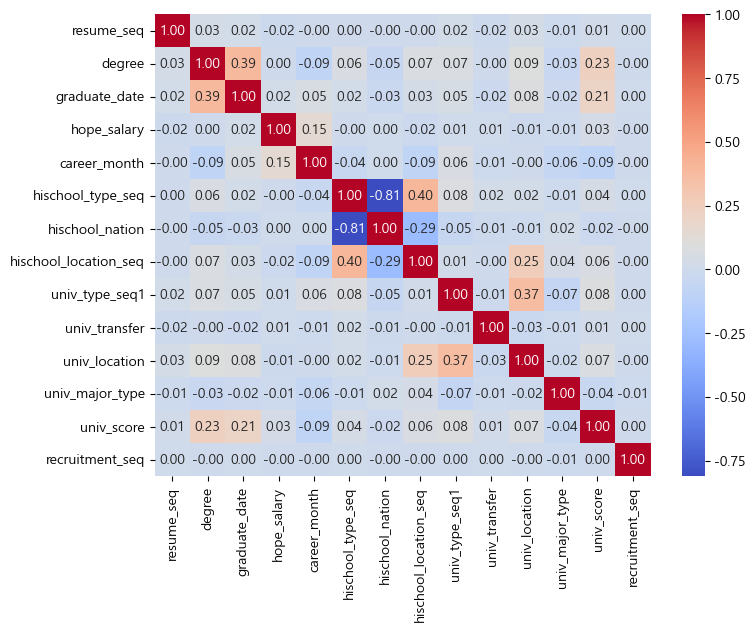

In [21]:
plt.figure(figsize=(8,6))
sns.heatmap(btrain.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [22]:
btrain.groupby('resume_seq').sum()

,degree,graduate_date,hope_salary,job_code_seq1,career_month,hischool_type_seq,hischool_nation,hischool_location_seq,univ_type_seq1,univ_transfer,univ_location,univ_major_type,univ_score,recruitment_seq
resume_seq,,,,,,,,,,,,,,
1,16,8036,6000.0,재료·화학·섬유·의복재료·화학·섬유·의복재료·화학·섬유·의복재료·화학·섬유·의복,0,84,4,16,20,0,68,36,80.0,21099
2,32,16040,0.0,재료·화학·섬유·의복재료·화학·섬유·의복재료·화학·섬유·의복재료·화학·섬유·의복재료...,584,0,16,0,40,0,24,64,720.0,26164
3,12,6012,0.0,재료·화학·섬유·의복재료·화학·섬유·의복재료·화학·섬유·의복,339,63,3,18,15,0,51,12,270.0,9679
4,68,34187,0.0,재료·화학·섬유·의복재료·화학·섬유·의복재료·화학·섬유·의복재료·화학·섬유·의복재료...,459,357,17,85,85,0,85,51,1190.0,49345
5,12,6033,0.0,재료·화학·섬유·의복재료·화학·섬유·의복재료·화학·섬유·의복,0,63,3,15,0,0,0,30,150.0,5120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8478,8,4006,0.0,재료·화학·섬유·의복재료·화학·섬유·의복,120,42,2,6,10,0,10,38,0.0,6109
8479,18,0,15000.0,재료·화학·섬유·의복재료·화학·섬유·의복재료·화학·섬유·의복재료·화학·섬유·의복재료...,354,126,0,18,18,0,18,54,0.0,19314
8480,8,0,0.0,디자인디자인,0,0,4,0,10,0,20,18,160.0,3955


In [23]:
btrain['job_code_seq1'].unique()

array(['재료·화학·섬유·의복', '경영·기획·회계·사무', '디자인', '영업·판매·TM', '건설·기계·전기·전자',
       '기타 직종', 'IT·게임', '문화·예술·신문·방송', '전문·교육·자격'], dtype=object)

---
회사
---
---

In [24]:
recruit

,recruitment_seq,address_seq1,address_seq2,address_seq3,career_end,career_start,check_box_keyword,education,major_task,qualifications,text_keyword
0,R02264,3.0,NaN,NaN,0,0,2507;2707;2810,4,8,1,NaN
1,R06317,3.0,NaN,NaN,0,0,2204;2205;2707,3,2,1,NaN
2,R04017,3.0,NaN,NaN,0,0,2101;2108;2201;2707,3,2,1,NaN
3,R02865,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,1,NaN
4,R04890,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...
6690,R03678,3.0,NaN,NaN,0,0,2101;2108;2201;2204;2205;2707,3,2,1,NaN
6691,R04593,3.0,NaN,NaN,0,0,2201;2204;2205;2707,4,2,1,NaN
6692,R03252,3.0,NaN,NaN,0,0,2109,3,2,1,NaN
6693,R05130,3.0,NaN,NaN,0,0,2201;2204;2205;2707,2,2,2,NaN


In [25]:
recruit.drop(['address_seq2', 'address_seq3', 'text_keyword'], axis=1, inplace=True)

In [26]:
recruit['recruitment_seq'] = recruit['recruitment_seq'].str[1:]
recruit

,recruitment_seq,address_seq1,career_end,career_start,check_box_keyword,education,major_task,qualifications
0,02264,3.0,0,0,2507;2707;2810,4,8,1
1,06317,3.0,0,0,2204;2205;2707,3,2,1
2,04017,3.0,0,0,2101;2108;2201;2707,3,2,1
3,02865,3.0,0,0,2201;2204;2205;2707,2,2,1
4,04890,3.0,0,0,2201;2204;2205;2707,2,2,2
...,...,...,...,...,...,...,...,...
6690,03678,3.0,0,0,2101;2108;2201;2204;2205;2707,3,2,1
6691,04593,3.0,0,0,2201;2204;2205;2707,4,2,1
6692,03252,3.0,0,0,2109,3,2,1
6693,05130,3.0,0,0,2201;2204;2205;2707,2,2,2


In [34]:
recruit['recruitment_seq'] = recruit['recruitment_seq'].astype(int)

In [28]:
recruit['address_seq1'] = recruit['address_seq1'].fillna(0)
recruit.isna().sum()

recruitment_seq      0
address_seq1         0
career_end           0
career_start         0
check_box_keyword    0
education            0
major_task           0
qualifications       0
dtype: int64

In [35]:
company['recruitment_seq'] = company['recruitment_seq'].str[1:]
company['recruitment_seq'] = company['recruitment_seq'].astype(int)

AttributeError: Can only use .str accessor with string values!

In [36]:
comp = pd.merge(company, recruit, on='recruitment_seq', how='outer')
comp

,recruitment_seq,company_type_seq,supply_kind,employee,address_seq1,career_end,career_start,check_box_keyword,education,major_task,qualifications
0,2073,2.0,514.0,20.0,3.0,0,0,2101;2109;2110;2203;2707,4,2,1
1,3274,2.0,402.0,90.0,3.0,0,0,2501;2507;2707,3,2,2
2,2195,2.0,514.0,20.0,3.0,0,0,2101;2201;2204;2205;2707,2,2,1
3,3372,4.0,100.0,60.0,3.0,0,0,2101;2201;2204;2205;2707,3,2,2
4,867,2.0,402.0,590.0,3.0,0,0,2101;2108;2201;2707,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...
6690,5101,NaN,NaN,NaN,3.0,0,0,2101;2201;2204;2205;2707,4,2,1
6691,4989,NaN,NaN,NaN,3.0,0,0,2507;2707,3,2,1
6692,3086,NaN,NaN,NaN,3.0,0,0,2507;2707,4,2,1
6693,3678,NaN,NaN,NaN,3.0,0,0,2101;2108;2201;2204;2205;2707,3,2,1


In [37]:
comp['recruitment_seq'] = comp['recruitment_seq'].astype(int)

In [38]:
combine = pd.merge(btrain, recruit, on='recruitment_seq', how='outer')
combine

,resume_seq,degree,graduate_date,hope_salary,job_code_seq1,career_month,hischool_type_seq,hischool_nation,hischool_location_seq,univ_type_seq1,...,univ_major_type,univ_score,recruitment_seq,address_seq1,career_end,career_start,check_box_keyword,education,major_task,qualifications
0,606,4,2008,3500.0,재료·화학·섬유·의복,67,21,1,11,5,...,4,70.0,4588,3.0,0,0,2507;2707,3,2,1
1,4681,5,2004,0.0,경영·기획·회계·사무,92,21,1,3,0,...,9,70.0,4588,3.0,0,0,2507;2707,3,2,1
2,2,4,2005,0.0,재료·화학·섬유·의복,73,0,2,0,5,...,8,90.0,4588,3.0,0,0,2507;2707,3,2,1
3,4582,5,2007,0.0,재료·화학·섬유·의복,78,16,1,5,5,...,9,80.0,4588,3.0,0,0,2507;2707,3,2,1
4,2285,4,2009,0.0,재료·화학·섬유·의복,100,0,2,0,0,...,3,90.0,4588,3.0,0,0,2507;2707,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57941,8092,4,2001,0.0,재료·화학·섬유·의복,166,21,1,3,5,...,0,80.0,4893,3.0,0,0,2501;2507;2707;2810,4,2,1
57942,3534,4,1997,7500.0,재료·화학·섬유·의복,234,21,1,7,3,...,19,80.0,521,3.0,0,0,2507;2707,4,2,1
57943,4635,4,2022,0.0,디자인,170,8,1,15,3,...,19,0.0,521,3.0,0,0,2507;2707,4,2,1
57944,2825,4,2009,0.0,재료·화학·섬유·의복,65,21,1,17,3,...,5,80.0,4215,20.0,0,0,2507;2707,4,2,1


In [39]:
combine.isna().sum()

resume_seq               0
degree                   0
graduate_date            0
hope_salary              0
job_code_seq1            0
career_month             0
hischool_type_seq        0
hischool_nation          0
hischool_location_seq    0
univ_type_seq1           0
univ_transfer            0
univ_location            0
univ_major_type          0
univ_score               0
recruitment_seq          0
address_seq1             0
career_end               0
career_start             0
check_box_keyword        0
education                0
major_task               0
qualifications           0
dtype: int64

---

In [40]:
combine.drop('check_box_keyword', axis=1, inplace=True)

In [41]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57946 entries, 0 to 57945
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   resume_seq             57946 non-null  int64  
 1   degree                 57946 non-null  int64  
 2   graduate_date          57946 non-null  int64  
 3   hope_salary            57946 non-null  float64
 4   job_code_seq1          57946 non-null  object 
 5   career_month           57946 non-null  int64  
 6   hischool_type_seq      57946 non-null  int64  
 7   hischool_nation        57946 non-null  int64  
 8   hischool_location_seq  57946 non-null  int64  
 9   univ_type_seq1         57946 non-null  int64  
 10  univ_transfer          57946 non-null  int64  
 11  univ_location          57946 non-null  int64  
 12  univ_major_type        57946 non-null  int64  
 13  univ_score             57946 non-null  float64
 14  recruitment_seq        57946 non-null  int64  
 15  ad

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

combine = pd.get_dummies(combine)
X = combine.drop(['resume_seq', 'recruitment_seq'], axis=1)
y = combine['recruitment_seq']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

std = StandardScaler()
X_train_sc = std.fit_transform(X_train)
X_test_sc = std.transform(X_test)

dtr = DecisionTreeRegressor()
dtr.fit(X_train_sc, y_train)
y_pred = dtr.predict(X_test_sc)

In [322]:
y_train

3110     5444
55352    6651
52417    1696
56693    4896
35647    5985
         ... 
54343    5944
38158    4944
860      4250
15795    2597
56422    6137
Name: recruitment_seq, Length: 40562, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# 데이터 분할
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
model = LogisticRegression()
model.fit(X_train, y_train)

# 모델 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"모델의 정확도: {accuracy}")


모델의 정확도: 0.0015531523239760698


In [65]:
y_test

45789    4298
34599    1187
30744    4450
3789     1597
28431    1651
         ... 
16492     925
46723    2761
47823    1748
4968      726
24628    1449
Name: recruitment_seq, Length: 17384, dtype: int64

In [66]:
y_pred

array([4200, 1214,  559, ...,  944, 4200,  944], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

print(mean_squared_error(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_absolute_percentage_error(y_test, y_pred))

7855120.837206627
2290.901288541187
2.5755512551011233


In [72]:
from sklearn.neighbors import KNeighborsClassifier

# KNeighborsClassifier 모델을 정의하고 훈련합니다.
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train_sc, y_train)

# 새로운 구직자에게 회사를 추천합니다.
pred_knc = model.predict(X_test_sc)

print(mean_squared_error(y_test, pred_knc))
print(mean_absolute_error(y_test, pred_knc))
print(mean_absolute_percentage_error(y_test, pred_knc))


7474569.829383341
2225.0773124712377
2.9532865563322725


In [78]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

boost = xgb.XGBRegressor()

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1]
}

grid = GridSearchCV(boost, param_grid, scoring='neg_mean_squared_error', cv=5)
grid.fit(X_train_sc, y_train)

best_params = grid.best_params_
print(f"최적의 파라미터: {best_params}")

최적의 파라미터: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 1}


In [ ]:
# 최적의 파라미터로 모델을 다시 훈련합니다.
boost = xgb.XGBRegressor(**best_params)
boost.fit(X_train_sc, y_train)
pred_xgb = boost.predict(X_test_sc)

In [77]:
print(mean_squared_error(y_test, pred_xgb))
print(mean_absolute_error(y_test, pred_xgb))
print(mean_absolute_percentage_error(y_test, pred_xgb))

3834085.1221068185
1682.269255492855
3.6127223675720477
